## 1. 环境准备模块

In [4]:
# %% [markdown]
# # N-gram 语言模型实验
# 本笔记本演示经典的N-gram语言模型实现

# %% [markdown]
# ## 1. 导入依赖
# %%
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

功能说明：

使用 defaultdict 实现自动创建嵌套字典，用于存储n-gram计数

%matplotlib inline 是Jupyter魔法命令，用于内嵌显示图表

可视化库 matplotlib 用于展示统计结果


## 2.模型核心类

In [5]:
# %% [markdown]
# ## 2. 模型实现
# %%
class NGramModel:
    def __init__(self, n=3):
        self.n = n
        self.ngrams = defaultdict(lambda: defaultdict(int))
        self.vocab = set()
    
    def train(self, text):
        tokens = text.split()
        self.vocab.update(tokens)
        
        # 生成n-gram统计
        for i in range(len(tokens) - self.n + 1):
            context = tuple(tokens[i:i+self.n-1])  # 前n-1个词作为上下文
            word = tokens[i+self.n-1]              # 第n个词作为预测目标
            self.ngrams[context][word] += 1
    
    def predict(self, context, top_k=1):
        context = tuple(context.split())
        if context not in self.ngrams:
            return f"没有找到'{' '.join(context)}'的统计信息"
            
        candidates = sorted(
            self.ngrams[context].items(),
            key=lambda x: x[1],
            reverse=True
        )
        return [word for word, count in candidates[:top_k]]

关键实现解析：

初始化方法：

n=3 表示默认使用三元模型（实际是2个词上下文预测下一个词）

ngrams 使用双重默认字典存储计数：{context: {word: count}}

vocab 记录所有出现过的词汇

训练方法：

将输入文本分割为词列表

滑动窗口生成n-gram模式

使用元组作为字典键（因为列表不可哈希）

预测方法：

处理未知上下文时返回友好提示

使用 sorted 进行频率排序

top_k 参数支持返回多个候选预测

 

## 3.模型训练

In [13]:
# %% [markdown]
# ## 3. 训练模型
# %%
# 示例训练数据
training_text = """
the cat sat on the mat 
the cat ate the fish 
the dog chased the cat
the dog hate the cat
I love the cat and the dog
"""

model = NGramModel(n=3)
model.train(training_text.strip())

## 4.验证测试

In [14]:
# %% [markdown]
# ## 4. 模型验证
# %% [markdown]
# ### 测试用例1：已知上下文
# %%
test_context = "the cat"
print(f"输入上下文: '{test_context}'")
print("预测结果:", model.predict(test_context))

# %% [markdown]
# ### 测试用例2：未知上下文
# %%
unknown_context = "the elephant"
print(f"输入未知上下文: '{unknown_context}'")
print("预测结果:", model.predict(unknown_context))

# %% [markdown]
# ### 测试用例3：多候选预测
# %%
multi_context = "the"
print(f"输入单字上下文: '{multi_context}'")
print("前3个预测结果:", model.predict(multi_context, top_k=3))

输入上下文: 'the cat'
预测结果: ['sat']
输入未知上下文: 'the elephant'
预测结果: 没有找到'the elephant'的统计信息
输入单字上下文: 'the'
前3个预测结果: 没有找到'the'的统计信息


## 5. 可视化展示

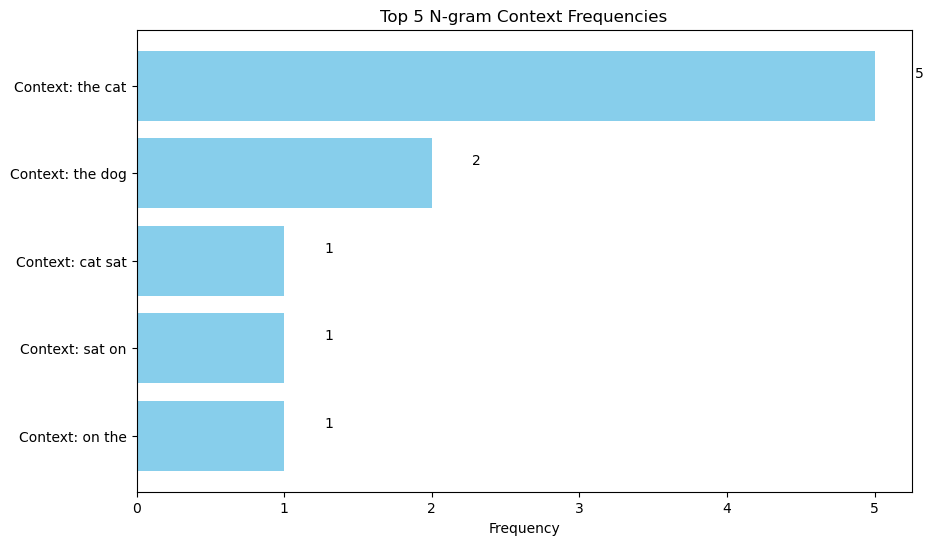

In [15]:
# %% [markdown]
# ## 5. 可视化分析
# %%
# 提取前5个最常见的上下文
top_contexts = sorted(
    model.ngrams.items(),
    key=lambda x: sum(x[1].values()),
    reverse=True
)[:5]

# 绘制条形图
plt.figure(figsize=(10,6))
bars = plt.barh(
    [f"Context: {' '.join(ctx)}" for ctx, _ in top_contexts],
    [sum(counts.values()) for _, counts in top_contexts],
    color='skyblue'
)

# 添加数据标签
for bar in bars:
    width = bar.get_width()
    plt.text(width+0.3, bar.get_y()+0.3, str(int(width)), ha='center')

plt.xlabel('Frequency')
plt.title('Top 5 N-gram Context Frequencies')
plt.gca().invert_yaxis()  # 频率从高到低显示
plt.show()